### Task 1: Create function myData to resample data `weekly` from Daily Temperature dataset

- Accepts the following parameters:
    * filepath, resampling_option (Set default to 'M')

- Should return
    * Resampled object, `weekly_mean`

In [1]:
def myData(filepath, resampling_option='M'):
    from pandas import Series
    
    try:
        series = Series.from_csv(filepath, header=0)

        resample = series.resample(resampling_option)
        weekly_mean = resample.mean()
        X = series.values

        return weekly_mean
    except:
        raise keyError

In [2]:
filepath = './data/daily-minimum-temperatures.csv'
resampling_option = 'W'

In [3]:
weekly_mean = myData(filepath, resampling_option)

### Task 2: Create function `myDeseasonalize` to deseazonalize weekly data by differencing for Daily Temperature dataset

- Accepts the following parameters:
    * filepath, weekly_mean (From the previous task)

- Should return
    * Plotting object, `diff` of the deseasonalized weekly data.

In [4]:
def myDeseasonalize(filepath, weekly_mean):
    from pandas import Series
    
    try:
        series = Series.from_csv(filepath, header=0)
        X = series.values
        diff = list()
        weeks_in_year = 52
        for i in range(weeks_in_year, len(weekly_mean)):
            value = weekly_mean[i] - weekly_mean[i - weeks_in_year]
            diff.append(value)

        return diff
    except:
        raise keyError

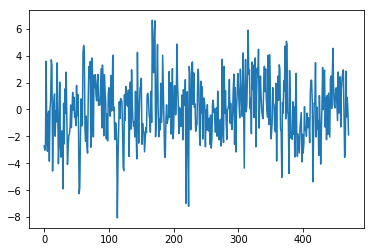

In [6]:
from matplotlib import pyplot

diff = myDeseasonalize(filepath, weekly_mean)
pyplot.plot(diff)
pyplot.show()

### Task 3: Create a function myDataFrame to create year, month columns from the Daily Temperature dataset

- Accepts the following parameters:
    * filepath

- Should return
    * New pandas dataframe from dataset that calculates `year` and `month` from existing values.
    * Rename the columns accordingly.

In [7]:
def myDataFrame(filepath):
    try:
        from pandas import Series, DataFrame

        series = Series.from_csv(filepath, header=0)
        dates = list(series.index)

        years = [date.year for date in dates]
        month = [date.month for date in dates]
        values = list(series.values)

        new_data = DataFrame([years, month, values])
        new_data = new_data.T

        new_data.columns = ['year', 'month', 'temperature']

        return new_data
    except:
        raise keyError

In [8]:
filepath = './data/daily-minimum-temperatures.csv'
new_data = myDataFrame(filepath)

In [9]:
new_data.head()

,year,month,temperature
0,1981.0,1.0,20.7
1,1981.0,1.0,17.9
2,1981.0,1.0,18.8
3,1981.0,1.0,14.6
4,1981.0,1.0,15.8
